In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive')

import pandas as pd
#Read the CSV files into DataFrames
df1 = pd.read_csv('Transactions.csv')
df1.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,transaction_date,stock_date,product_id,customer_id,store_id,quantity
0,1/1/1997,12/31/1996,869,3449,6,5
1,1/1/1997,12/31/1996,1472,3449,6,3
2,1/1/1997,12/28/1996,76,3449,6,4
3,1/1/1997,12/26/1996,320,3449,6,3
4,1/1/1997,12/25/1996,4,3449,6,4


In [ ]:
#Read the CSV files into DataFrames
df2 = pd.read_csv('Customer-Lookup.csv')
df2.head()

,customer_id,customer_acct_num,first_name,last_name,customer_address,customer_city,customer_state_province,customer_postal_code,customer_country,birthdate,marital_status,yearly_income,gender,total_children,num_children_at_home,education,acct_open_date,member_card,occupation,homeowner
0,1,87462024688,Sheri,Nowmer,2433 Bailey Road,Tlaxiaco,Oaxaca,15057,Mexico,8/26/1961,M,$30K - $50K,F,4,2,Partial High School,9/10/1991,Bronze,Skilled Manual,Y
1,2,87470586299,Derrick,Whelply,2219 Dewing Avenue,Sooke,BC,17172,Canada,7/3/1915,S,$70K - $90K,M,1,0,Partial High School,3/11/1993,Bronze,Professional,N
2,3,87475757600,Jeanne,Derry,7640 First Ave.,Issaquah,WA,73980,USA,6/21/1910,M,$50K - $70K,F,1,1,Bachelors Degree,6/11/1991,Bronze,Professional,Y
3,4,87500482201,Michael,Spence,337 Tosca Way,Burnaby,BC,74674,Canada,6/20/1969,M,$10K - $30K,M,4,4,Partial High School,5/21/1994,Normal,Skilled Manual,N
4,5,87514054179,Maya,Gutierrez,8668 Via Neruda,Novato,CA,57355,USA,5/10/1951,S,$30K - $50K,F,3,0,Partial College,8/21/1992,Silver,Manual,N


In [ ]:
#Join the DataFrames
merged_df = pd.merge(df1, df2, on='customer_id')
merged_df.head()

,transaction_date,stock_date,product_id,customer_id,store_id,quantity,customer_acct_num,first_name,last_name,customer_address,...,marital_status,yearly_income,gender,total_children,num_children_at_home,education,acct_open_date,member_card,occupation,homeowner
0,1/1/1997,12/31/1996,869,3449,6,5,27508307099,Lana,Weis,9648 Maureen Circle,...,M,$30K - $50K,F,2,0,High School Degree,12/7/1994,Bronze,Skilled Manual,Y
1,1/1/1997,12/31/1996,1472,3449,6,3,27508307099,Lana,Weis,9648 Maureen Circle,...,M,$30K - $50K,F,2,0,High School Degree,12/7/1994,Bronze,Skilled Manual,Y
2,1/1/1997,12/28/1996,76,3449,6,4,27508307099,Lana,Weis,9648 Maureen Circle,...,M,$30K - $50K,F,2,0,High School Degree,12/7/1994,Bronze,Skilled Manual,Y
3,1/1/1997,12/26/1996,320,3449,6,3,27508307099,Lana,Weis,9648 Maureen Circle,...,M,$30K - $50K,F,2,0,High School Degree,12/7/1994,Bronze,Skilled Manual,Y
4,1/1/1997,12/25/1996,4,3449,6,4,27508307099,Lana,Weis,9648 Maureen Circle,...,M,$30K - $50K,F,2,0,High School Degree,12/7/1994,Bronze,Skilled Manual,Y


In [ ]:
# Get required data, drop dates
merged_df.drop(columns = ['transaction_date', 'stock_date'], inplace=True)
merged_df.head()

,product_id,customer_id,store_id,quantity,customer_acct_num,first_name,last_name,customer_address,customer_city,customer_state_province,...,marital_status,yearly_income,gender,total_children,num_children_at_home,education,acct_open_date,member_card,occupation,homeowner
0,869,3449,6,5,27508307099,Lana,Weis,9648 Maureen Circle,Pomona,CA,...,M,$30K - $50K,F,2,0,High School Degree,12/7/1994,Bronze,Skilled Manual,Y
1,1472,3449,6,3,27508307099,Lana,Weis,9648 Maureen Circle,Pomona,CA,...,M,$30K - $50K,F,2,0,High School Degree,12/7/1994,Bronze,Skilled Manual,Y
2,76,3449,6,4,27508307099,Lana,Weis,9648 Maureen Circle,Pomona,CA,...,M,$30K - $50K,F,2,0,High School Degree,12/7/1994,Bronze,Skilled Manual,Y
3,320,3449,6,3,27508307099,Lana,Weis,9648 Maureen Circle,Pomona,CA,...,M,$30K - $50K,F,2,0,High School Degree,12/7/1994,Bronze,Skilled Manual,Y
4,4,3449,6,4,27508307099,Lana,Weis,9648 Maureen Circle,Pomona,CA,...,M,$30K - $50K,F,2,0,High School Degree,12/7/1994,Bronze,Skilled Manual,Y


In [ ]:
# Get required data, drop IDs
merged_df.drop(columns = ['product_id', 'customer_id', 'store_id'], inplace=True)
merged_df.head()

,quantity,customer_acct_num,first_name,last_name,customer_address,customer_city,customer_state_province,customer_postal_code,customer_country,birthdate,marital_status,yearly_income,gender,total_children,num_children_at_home,education,acct_open_date,member_card,occupation,homeowner
0,5,27508307099,Lana,Weis,9648 Maureen Circle,Pomona,CA,16093,USA,11/26/1979,M,$30K - $50K,F,2,0,High School Degree,12/7/1994,Bronze,Skilled Manual,Y
1,3,27508307099,Lana,Weis,9648 Maureen Circle,Pomona,CA,16093,USA,11/26/1979,M,$30K - $50K,F,2,0,High School Degree,12/7/1994,Bronze,Skilled Manual,Y
2,4,27508307099,Lana,Weis,9648 Maureen Circle,Pomona,CA,16093,USA,11/26/1979,M,$30K - $50K,F,2,0,High School Degree,12/7/1994,Bronze,Skilled Manual,Y
3,3,27508307099,Lana,Weis,9648 Maureen Circle,Pomona,CA,16093,USA,11/26/1979,M,$30K - $50K,F,2,0,High School Degree,12/7/1994,Bronze,Skilled Manual,Y
4,4,27508307099,Lana,Weis,9648 Maureen Circle,Pomona,CA,16093,USA,11/26/1979,M,$30K - $50K,F,2,0,High School Degree,12/7/1994,Bronze,Skilled Manual,Y


In [ ]:
# Get required data, unnecessary customer features
merged_df.drop(columns = ['customer_acct_num', 'first_name', 'last_name', 'customer_address', 'customer_city', 'customer_state_province', 'customer_postal_code', 'customer_country', 'marital_status', 'total_children', 'num_children_at_home', 'education', 'acct_open_date', 'occupation', 'homeowner'], inplace=True)
merged_df.head()

,quantity,birthdate,yearly_income,gender,member_card
0,5,11/26/1979,$30K - $50K,F,Bronze
1,3,11/26/1979,$30K - $50K,F,Bronze
2,4,11/26/1979,$30K - $50K,F,Bronze
3,3,11/26/1979,$30K - $50K,F,Bronze
4,4,11/26/1979,$30K - $50K,F,Bronze


In [ ]:
# Check data types
print(merged_df.dtypes)

quantity          int64
birthdate        object
yearly_income    object
gender           object
member_card      object
dtype: object


In [ ]:
merged_df['birthdate'] = pd.to_datetime(merged_df['birthdate'])
print(merged_df.dtypes)

quantity                  int64
birthdate        datetime64[ns]
yearly_income            object
gender                   object
member_card              object
dtype: object


In [ ]:
# Replace birthdate with Age
merged_df['birthdate'] = pd.Timestamp('now').year - merged_df['birthdate'].dt.year
merged_df.head()

,quantity,birthdate,yearly_income,gender,member_card
0,5,45,$30K - $50K,F,Bronze
1,3,45,$30K - $50K,F,Bronze
2,4,45,$30K - $50K,F,Bronze
3,3,45,$30K - $50K,F,Bronze
4,4,45,$30K - $50K,F,Bronze


In [ ]:
# Rename column
merged_df = merged_df.rename(columns={'birthdate': 'age'})
merged_df.head()

,quantity,age,yearly_income,gender,member_card
0,5,45,$30K - $50K,F,Bronze
1,3,45,$30K - $50K,F,Bronze
2,4,45,$30K - $50K,F,Bronze
3,3,45,$30K - $50K,F,Bronze
4,4,45,$30K - $50K,F,Bronze


In [ ]:
# Label encoding for gender
le = LabelEncoder()
merged_df['gender']= le.fit_transform(merged_df['gender'])
merged_df.head()

,quantity,age,yearly_income,gender,member_card
0,5,45,$30K - $50K,0,Bronze
1,3,45,$30K - $50K,0,Bronze
2,4,45,$30K - $50K,0,Bronze
3,3,45,$30K - $50K,0,Bronze
4,4,45,$30K - $50K,0,Bronze


In [ ]:
# Label encoding for member card
le = LabelEncoder()
merged_df['member_card']= le.fit_transform(merged_df['member_card'])
merged_df.head()

,quantity,age,yearly_income,gender,member_card
0,5,45,$30K - $50K,0,0
1,3,45,$30K - $50K,0,0
2,4,45,$30K - $50K,0,0
3,3,45,$30K - $50K,0,0
4,4,45,$30K - $50K,0,0


In [ ]:
# Set a threshold value
threshold = 2

# Create a new column 'is_above_threshold' based on the condition
merged_df['is_above_threshold'] = df['quantity'].apply(lambda x: 1 if x > threshold else 0)

# Print the updated DataFrame
print(merged_df)


       quantity  age  yearly_income  gender  member_card  is_above_threshold
0             5   45    $30K - $50K       0            0                   1
1             3   45    $30K - $50K       0            0                   1
2             4   45    $30K - $50K       0            0                   1
3             3   45    $30K - $50K       0            0                   1
4             4   45    $30K - $50K       0            0                   1
...         ...  ...            ...     ...          ...                 ...
86832         2   51    $30K - $50K       0            0                   0
86833         1   51    $30K - $50K       0            0                   0
86834         2   51    $30K - $50K       0            0                   0
86835         1  112  $110K - $130K       0            3                   0
86836         2  112  $110K - $130K       0            3                   0

[86837 rows x 6 columns]


In [ ]:
merged_df = merged_df.drop('quantity', axis=1)

# Print the updated DataFrame
print(merged_df)

       age  yearly_income  gender  member_card  is_above_threshold
0       45    $30K - $50K       0            0                   1
1       45    $30K - $50K       0            0                   1
2       45    $30K - $50K       0            0                   1
3       45    $30K - $50K       0            0                   1
4       45    $30K - $50K       0            0                   1
...    ...            ...     ...          ...                 ...
86832   51    $30K - $50K       0            0                   0
86833   51    $30K - $50K       0            0                   0
86834   51    $30K - $50K       0            0                   0
86835  112  $110K - $130K       0            3                   0
86836  112  $110K - $130K       0            3                   0

[86837 rows x 5 columns]


In [ ]:
import re

pattern = r"\$(\d+)K - \$(\d+)K"

merged_df['min_salary'] = merged_df['yearly_income'].apply(lambda x: int(re.match(pattern, x).group(1)) * 1000 if re.match(pattern, x) else None)
merged_df['max_salary'] = merged_df['yearly_income'].apply(lambda x: int(re.match(pattern, x).group(2)) * 1000 if re.match(pattern, x) else None)

merged_df['average_salary'] = (merged_df['min_salary'] + merged_df['max_salary']) // 2

merged_df.drop('yearly_income', axis=1, inplace=True)

print(merged_df)

       age  gender  member_card  is_above_threshold  min_salary  max_salary  \
0       45       0            0                   1     30000.0     50000.0   
1       45       0            0                   1     30000.0     50000.0   
2       45       0            0                   1     30000.0     50000.0   
3       45       0            0                   1     30000.0     50000.0   
4       45       0            0                   1     30000.0     50000.0   
...    ...     ...          ...                 ...         ...         ...   
86832   51       0            0                   0     30000.0     50000.0   
86833   51       0            0                   0     30000.0     50000.0   
86834   51       0            0                   0     30000.0     50000.0   
86835  112       0            3                   0    110000.0    130000.0   
86836  112       0            3                   0    110000.0    130000.0   

       average_salary  
0             40000.0  
1  

<ipython-input-382-6222b4f646d0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df['average_salary'])


<Axes: xlabel='average_salary', ylabel='Density'>

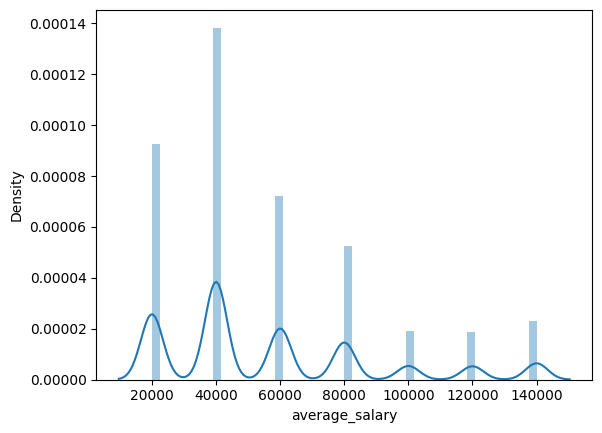

In [ ]:
# Average Salary distribution
sns.distplot(merged_df['average_salary'])

In [ ]:
# Get required data, drop dates
merged_df.drop(columns = ['min_salary', 'max_salary'], inplace=True)
merged_df = merged_df[['age', 'gender', 'member_card', 'average_salary', 'is_above_threshold']]

print(merged_df)

       age  gender  member_card  average_salary  is_above_threshold
0       45       0            0         40000.0                   1
1       45       0            0         40000.0                   1
2       45       0            0         40000.0                   1
3       45       0            0         40000.0                   1
4       45       0            0         40000.0                   1
...    ...     ...          ...             ...                 ...
86832   51       0            0         40000.0                   0
86833   51       0            0         40000.0                   0
86834   51       0            0         40000.0                   0
86835  112       0            3        120000.0                   0
86836  112       0            3        120000.0                   0

[86837 rows x 5 columns]


In [ ]:
# Split data into dependent/independent variables
X = merged_df.iloc[:, :-1].values
y = merged_df.iloc[:, -1].values

In [ ]:
# Split data into test/train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

<Axes: >

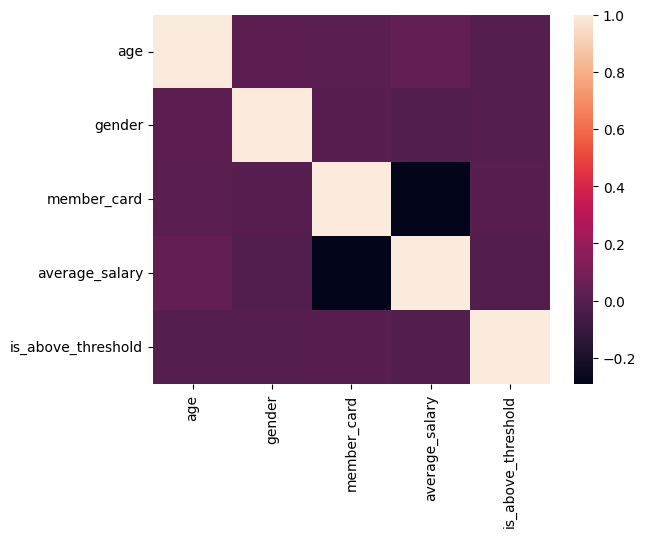

In [ ]:
# Correlation matrix
merged_df.corr()
sns.heatmap(merged_df.corr())

In [ ]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Decision Tree Classification
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Prediction
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[1 1]
 [1 0]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [ ]:
# Accuracy
accuracy_score(y_test, y_pred)

0.7532012897282359

In [ ]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.53      0.06      0.11      5397
           1       0.76      0.98      0.86     16313

    accuracy                           0.75     21710
   macro avg       0.65      0.52      0.48     21710
weighted avg       0.70      0.75      0.67     21710



<Axes: >

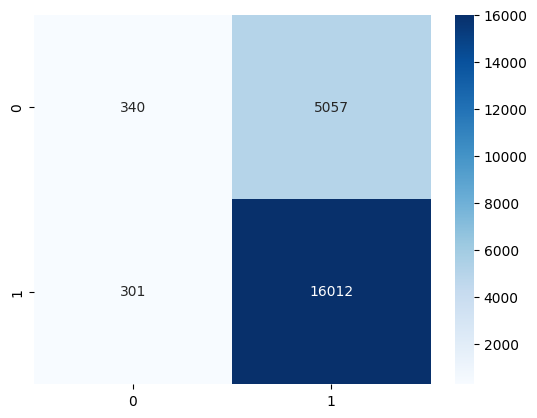

In [ ]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)

In [ ]:
# Predict purchase with Age(45) and Salary(97000)
print(classifier.predict(sc.transform([[60, 1, 2, 100000]])))

[1]
